# 用 CNN 做圖形辨識

In [32]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#讀入 MNIST
from keras.datasets import mnist
from keras.utils import np_utils

#讀入 keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

env: KERAS_BACKEND=tensorflow


### 匯入資料

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)                  # CNN 要的是 (28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train[1234].shape
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train/255
x_test = x_test/255

### 建構神經網路

In [58]:
### Convolution
# 做三次Convolution，filters 數分別是 4, 8, 16；filter 大小都是 4x4，max-pooling 都用 2x2 為一小區塊

model = Sequential()
#第一次
model.add(Conv2D(8, (4, 4), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#第二次
model.add(Conv2D(16, (4, 4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#第三次
model.add(Conv2D(32, (4, 4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())            ##拉平
model.add(Dense(9))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

### 建構神經網路

In [60]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])
model.summary()              
# 4*4*8+8*1=136

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 8)         136       
_________________________________________________________________
activation_36 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 16)        2064      
_________________________________________________________________
activation_37 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 32)          8224      
__________

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelfit=model.fit(x_train, y_train, batch_size=128, epochs=10,validation_split=0.2)              ###training model

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 19s 404us/step - loss: 0.9143 - acc: 0.7066 - val_loss: 0.3518 - val_acc: 0.8493
Epoch 2/10
48000/48000 [==============================] - 18s 378us/step - loss: 0.1999 - acc: 0.9363 - val_loss: 0.1193 - val_acc: 0.9643
Epoch 3/10
48000/48000 [==============================] - 18s 380us/step - loss: 0.1129 - acc: 0.9662 - val_loss: 0.0965 - val_acc: 0.9710
Epoch 4/10
48000/48000 [==============================] - 18s 381us/step - loss: 0.0855 - acc: 0.9740 - val_loss: 0.0917 - val_acc: 0.9724
Epoch 5/10
48000/48000 [==============================] - 19s 389us/step - loss: 0.0713 - acc: 0.9779 - val_loss: 0.0721 - val_acc: 0.9778
Epoch 6/10
48000/48000 [==============================] - 19s 400us/step - loss: 0.0615 - acc: 0.9813 - val_loss: 0.0717 - val_acc: 0.9784
Epoch 7/10
48000/48000 [==============================] - 19s 404us/step - loss: 0.0513 - acc: 0.9848 - val_loss: 0.

### 查看結果

In [62]:
score_fork = model.evaluate(x_test, y_test, batch_size=1000)
print('loss:',score_fork[0],'acc:',score_fork[1] )


10000/10000 [==============================] - 1s 115us/step
loss: 0.03944900692440569 acc: 0.986299991607666


In [63]:
model.save('myCNNmodel.h5')      #save model 

In [64]:
from keras.models import load_model
mod = load_model('myCNNmodel.h5')

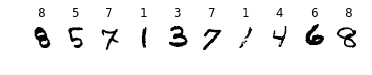

In [65]:
del modelfit
predict = mod.predict_classes(x_test)
pick = np.random.randint(1,9999, 10)

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")

結論：
(1) 這次的訓練結果可讓準確率高達98%。
(2) 增加filter數可以讓準確性提高。